How many different companies are represented in the data set?
What is the total number of jobs created for businesses in Queens?
How many different unique email domains names are there in the data set?
Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
Save your result for the previous question as a CSV file.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
value = pd.read_csv('value.csv')

How many different companies are represented in the data set?

In [139]:
print(len(pd.unique(value['Company Name'])))

439


What is the total number of jobs created for businesses in Queens? In order to get calculate this, one must first filter by City = 'Queens' and then count the total in 'job created'.  

In [140]:
queens = value[value['City'] == 'Queens']

In [141]:
sumjobcreated = queens['Job created'].sum()

In [142]:
print(sumjobcreated)

90.0


 How many different unique email domains names are there in the data set?

In [143]:
email = value['company email']

In [144]:
print(email)

0         eskoblo@energyspec.com
1                            NaN
2                            NaN
3      akimball@industrycity.com
4          clettich@silvprop.com
                 ...            
445     donaldlau@wontonfood.com
446         brawnworks@gmail.com
447             sheidya@wwps.com
448       keren@wudfurniture.com
449         bill.popp@wurtec.com
Name: company email, Length: 450, dtype: object


In [145]:
email = email.dropna()

In [146]:
print(email)

0         eskoblo@energyspec.com
3      akimball@industrycity.com
4          clettich@silvprop.com
5          jmccalla@silvprop.com
6              barbara@dial7.com
                 ...            
445     donaldlau@wontonfood.com
446         brawnworks@gmail.com
447             sheidya@wwps.com
448       keren@wudfurniture.com
449         bill.popp@wurtec.com
Name: company email, Length: 433, dtype: object


In [147]:
print(len(email))

433


In [148]:
email.head()

0       eskoblo@energyspec.com
3    akimball@industrycity.com
4        clettich@silvprop.com
5        jmccalla@silvprop.com
6            barbara@dial7.com
Name: company email, dtype: object

In [149]:
value[['name','domain']] = email.str.split("@", n=1, expand=True)

In [150]:
print(value.head())

                               Company Name    company contact  \
0                            1 State Street      David Neiburg   
1                            100 Church LLC  Edward A. Carroll   
2                      100 Wall Investments       Jerry Branam   
3               1-10 Bush Terminal Owner LP     Andrew Kimball   
4  120 Broadway Acquisitions JV, LLC (Ldmk)        Carl Letich   

               company email company phone                Address      City  \
0     eskoblo@energyspec.com    7186779077          1114 Avenue J  Brooklyn   
1                        NaN    2125663000      100 Church Street        NY   
2                        NaN    2122487160         96 Wall Street  New York   
3  akimball@industrycity.com    3474178429  220 36th St, Suite 2A  Brooklyn   
4      clettich@silvprop.com    2124064020           120 Broadway  New York   

  State  Postcode    Industry  \
0    NY     11230  Commercial   
1    NY     10007  Commercial   
2    NY     10005    Landlord

In [151]:
domain = value['domain']

In [152]:
domain = domain.dropna()

In [153]:
print(len(domain))

428


In [154]:
print(domain)

0        energyspec.com
3      industrycity.com
4          silvprop.com
5          silvprop.com
6             dial7.com
             ...       
445      wontonfood.com
446           gmail.com
447            wwps.com
448    wudfurniture.com
449          wurtec.com
Name: domain, Length: 428, dtype: object


In [155]:
print(len(pd.unique(domain)))

356


Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? Save your result for the previous question as a CSV file.

In [156]:
result = value[['Company Name','NTA','Total Savings','Job created']]

In [157]:
result1 = result[result['NTA'].map(result['NTA'].value_counts())>5]

In [158]:
print(result1.head())

                               Company Name  \
2                      100 Wall Investments   
3               1-10 Bush Terminal Owner LP   
4  120 Broadway Acquisitions JV, LLC (Ldmk)   
5                      120 Wall Street, LLC   
6                      139 ACA Realty, Inc.   

                                    NTA  Total Savings  Job created  
2     Battery Park City-Lower Manhattan      302959.40          NaN  
3                      Sunset Park West        2159.67          NaN  
4     Battery Park City-Lower Manhattan      922407.32          NaN  
5     Battery Park City-Lower Manhattan      368601.17          NaN  
6  Hunters Point-Sunnyside-West Maspeth        1637.29          NaN  


In [159]:
Bedfordsavingsmean = result[result['NTA']=='Bedford']['Total Savings'].mean()
print(Bedfordsavingsmean)

62113.34333333333


In [160]:
Bedfordjobcreated=result[result['NTA']=='Bedford']['Job created'].sum()
print(Bedfordjobcreated)

0.0


In [161]:
savingsmean = result1.groupby('NTA')['Total Savings'].mean()
print(savingsmean)

NTA
Battery Park City-Lower Manhattan                   469890.796667
Bushwick South                                       26140.455000
Carroll Gardens-Columbia Street-Red Hook             24337.390000
College Point                                        17159.372857
Crown Heights North                                   4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     59950.340000
East New York                                        48433.093333
East Williamsburg                                    13990.626364
Greenpoint                                            9753.649286
Hunters Point-Sunnyside-West Maspeth                 23931.398933
Hunts Point                                          39246.016154
Manhattanville                                        2760.888889
Maspeth                                               6658.283333
Mott Haven-Port Morris                               17843.937857
Queensbridge-Ravenswood-Long Island City             61830.770625
Steinw

In [162]:
jobcreated = result1.groupby('NTA')['Job created'].sum()
print(jobcreated)

NTA
Battery Park City-Lower Manhattan                    0.0
Bushwick South                                      10.0
Carroll Gardens-Columbia Street-Red Hook             0.0
College Point                                        2.0
Crown Heights North                                  0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     0.0
East New York                                       15.0
East Williamsburg                                    0.0
Greenpoint                                           0.0
Hunters Point-Sunnyside-West Maspeth                 0.0
Hunts Point                                         12.0
Manhattanville                                       0.0
Maspeth                                             10.0
Mott Haven-Port Morris                              10.0
Queensbridge-Ravenswood-Long Island City             0.0
Steinway                                            20.0
Sunset Park West                                     0.0
park-cemetery-etc-Brooklyn 

Now we need to import "savingsmean" and "jobcreated" to a csv file

In [163]:
savingsmean.to_csv('answer4.csv')

In [164]:
jobcreated.to_csv('answer4b.csv')

Day5

Using the same data set and results that you were working with in the pandas action items section (Day 4), create a
scatter plot of jobs created (y-axis) versus average savings (x-axis). Use both a standard and a logarithmic scale for the average savings.
histogram of the log of the average total savings.
line plot of the total jobs created for each month.

<function matplotlib.pyplot.show(close=None, block=None)>

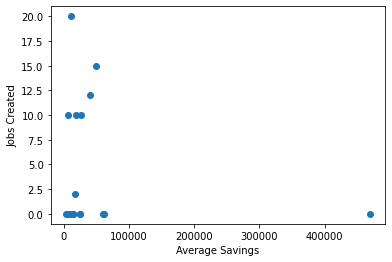

In [174]:
#Use the following code to create a scatter plot.
plt.scatter(savingsmean, jobcreated)
plt.xlabel('Average Savings')
plt.ylabel('Jobs Created')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

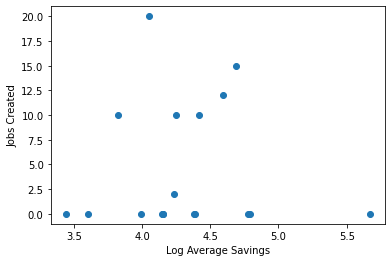

In [175]:
log_savingsmean = np.log10(savingsmean)
plt.scatter(log_savingsmean, jobcreated)
plt.xlabel('Log Average Savings')
plt.ylabel('Jobs Created')
plt.show

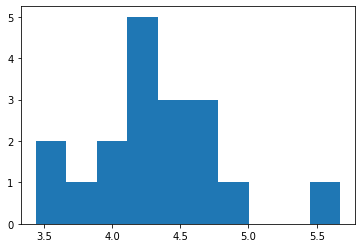

In [176]:
plt.hist(log_savingsmean)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

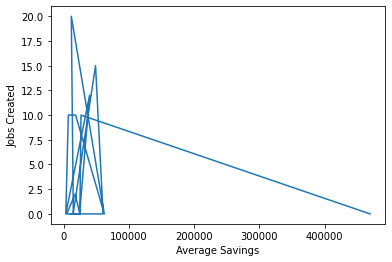

In [177]:
plt.plot(savingsmean, jobcreated)
plt.xlabel('Average Savings')
plt.ylabel('Jobs Created')
plt.show